In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm

In [2]:
x = [1,2,3]
X = np.array(x)
print(X)

[1 2 3]


In [3]:
df = pd.read_csv('TheNBACSV/nbaNew.csv', delimiter=',', encoding="utf-8-sig")
df

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,8035.0,1986.0,A.C. Green,NaN,PF,22.0,LAL,82.0,1.0,1542.0,...,61.10%,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0
1,8420.0,1987.0,A.C. Green,NaN,PF,23.0,LAL,79.0,72.0,2240.0,...,78.00%,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0
2,8807.0,1988.0,A.C. Green,NaN,PF,24.0,LAL,82.0,64.0,2636.0,...,77.30%,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0
3,9242.0,1989.0,A.C. Green,NaN,PF,25.0,LAL,82.0,82.0,2510.0,...,78.60%,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0
4,9688.0,1990.0,A.C. Green,"$1,750,000.00",PF,26.0,LAL,82.0,82.0,2709.0,...,75.10%,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
5,10166.0,1991.0,A.C. Green,"$1,750,000.00",PF,27.0,LAL,82.0,21.0,2164.0,...,73.80%,201.0,315.0,516.0,71.0,59.0,23.0,99.0,117.0,750.0
6,10617.0,1992.0,A.C. Green,"$1,750,000.00",PF,28.0,LAL,82.0,53.0,2902.0,...,74.40%,306.0,456.0,762.0,117.0,91.0,36.0,111.0,141.0,1116.0
7,11060.0,1993.0,A.C. Green,"$1,885,000.00",PF,29.0,LAL,82.0,55.0,2819.0,...,73.90%,287.0,424.0,711.0,116.0,88.0,39.0,116.0,149.0,1051.0
8,11529.0,1994.0,A.C. Green,"$6,472,600.00",PF,30.0,PHO,82.0,55.0,2825.0,...,73.50%,275.0,478.0,753.0,137.0,70.0,38.0,100.0,142.0,1204.0
9,11999.0,1995.0,A.C. Green,"$6,473,000.00",SF,31.0,PHO,82.0,52.0,2687.0,...,73.20%,194.0,475.0,669.0,127.0,55.0,31.0,114.0,146.0,916.0


In [4]:

sortedAgeDF = df.sort_values(by="Age", ascending=False)
sortedAgeDF

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14225,18736.0,2007.0,Kevin Willis,NaN,PF,44.0,DAL,5.0,0.0,43.0,...,100.00%,2.0,6.0,8.0,1.0,2.0,1.0,2.0,11.0,12.0
19916,13232.0,1997.0,Robert Parish*,"$1,150,000.00",C,43.0,CHI,43.0,3.0,406.0,...,67.70%,42.0,47.0,89.0,22.0,6.0,19.0,28.0,40.0,161.0
14224,17654.0,2005.0,Kevin Willis,NaN,C,42.0,ATL,29.0,5.0,344.0,...,73.90%,29.0,47.0,76.0,9.0,8.0,7.0,15.0,53.0,87.0
6712,19720.0,2009.0,Dikembe Mutombo*,NaN,C,42.0,HOU,9.0,2.0,96.0,...,66.70%,12.0,21.0,33.0,0.0,0.0,11.0,6.0,11.0,16.0
19915,12644.0,1996.0,Robert Parish*,"$1,000,000.00",C,42.0,CHH,74.0,34.0,1086.0,...,70.40%,89.0,214.0,303.0,29.0,21.0,54.0,50.0,80.0,290.0
13447,9108.0,1989.0,Kareem Abdul-Jabbar*,NaN,C,41.0,LAL,74.0,74.0,1695.0,...,73.90%,103.0,231.0,334.0,74.0,38.0,85.0,95.0,196.0,748.0
14223,17067.0,2004.0,Kevin Willis,"$1,300,000.00",C,41.0,SAS,48.0,0.0,373.0,...,61.50%,37.0,61.0,98.0,11.0,21.0,9.0,32.0,61.0,164.0
6711,19125.0,2008.0,Dikembe Mutombo*,"$794,491.00",C,41.0,HOU,39.0,25.0,619.0,...,71.10%,68.0,131.0,199.0,5.0,11.0,48.0,17.0,55.0,118.0
2270,2900.0,1970.0,Bob Cousy*,NaN,PG,41.0,CIN,7.0,NaN,34.0,...,100.00%,NaN,NaN,5.0,10.0,NaN,NaN,NaN,11.0,5.0
19914,12144.0,1995.0,Robert Parish*,"$2,500,000.00",C,41.0,CHH,81.0,4.0,1352.0,...,70.30%,93.0,257.0,350.0,44.0,27.0,36.0,66.0,132.0,389.0


In [5]:
oldestPlayer = sortedAgeDF.loc[sortedAgeDF.index[:1], ["PlayerName", "Age"]]
print(oldestPlayer)

         PlayerName   Age
14225  Kevin Willis  44.0


In [6]:
df.keys()

Index(['#', 'SeasonStart', 'PlayerName', 'PlayerSalary ', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS',
       'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:
def salaryCleaner(arr):
    retArr = []
    highestSalary = 0.0
    for i in range(len(arr)):
        #print(arr[i])
        x = str(arr[i])
        stringer = ""
        #print(x)
        for j in range(len(x)):
            if x[j] != '$' and x[j] != ',' and x[j] < 'a':
                stringer = stringer + x[j]
        #print(stringer)
        stringer = stringer.strip()
        if len(stringer) > 1:
            floater = float(stringer)
            retArr.append(floater)
        else:
            retArr.append(-1.0)

    #print(highestSalary)
    return retArr

def percentRemover(arr):
    retArr = []
    #print(arr)
    for i in arr:
        #print(i)
        x = str(i)
        stringer = ""
        for j in range(len(x)-1):
            stringer = stringer + x[j]
        #print(stringer)
        stringer = stringer.strip()
        if len(stringer) > 2:
            retArr.append(float(stringer))
        else:
            retArr.append(-1.0)
    return retArr
        

df['PlayerSalary '] = np.array(salaryCleaner(df['PlayerSalary ']))

df['TS%'] = np.array(percentRemover(np.array(df['TS%']).tolist()))
df['ORB%'] = np.array(percentRemover(np.array(df['ORB%']).tolist()))
df['DRB%'] = np.array(percentRemover(np.array(df['DRB%']).tolist()))
df['TRB%'] = np.array(percentRemover(np.array(df['TRB%']).tolist()))
df['AST%'] = np.array(percentRemover(np.array(df['AST%']).tolist()))
df['STL%'] = np.array(percentRemover(np.array(df['STL%']).tolist()))
df['BLK%'] = np.array(percentRemover(np.array(df['BLK%']).tolist()))
df['TOV%'] = np.array(percentRemover(np.array(df['TOV%']).tolist()))
df['USG%'] = np.array(percentRemover(np.array(df['USG%']).tolist()))
df['FG%'] = np.array(percentRemover(np.array(df['FG%']).tolist()))
df['3P%'] = np.array(percentRemover(np.array(df['3P%']).tolist()))
df['2P%'] = np.array(percentRemover(np.array(df['2P%']).tolist()))
df['eFG%'] = np.array(percentRemover(np.array(df['eFG%']).tolist()))
df['FT%'] = np.array(percentRemover(np.array(df['FT%']).tolist()))
df['FTr'] = np.array(percentRemover(np.array(df['FTr']).tolist()))

sortedSalaryDF = df.sort_values(by="PlayerSalary ", ascending=False)
sortedSalaryDF.loc[sortedSalaryDF.index[:5], ["PlayerName", "PlayerSalary ", "Pos", "TS%"]] #print these columns
#top5MostPaid = sortedSalaryDF.loc[sortedSalaryDF["PlayerSalary "] > 10000.0] #print all columns
#top5MostPaid.head(5)


,PlayerName,PlayerSalary,Pos,TS%
21743,Stephen Curry,34682550.0,PG,62.4
14948,LeBron James,33285709.0,SF,61.9
16756,Michael Jordan*,33140000.0,SG,56.7
18406,Paul Millsap,31269231.0,PF,54.2
14947,LeBron James,30963450.0,SF,58.8


In [8]:
df
df.loc[0]
df.loc[df['PlayerName'] == "Kobe Bryant"]


,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14322,12900.0,1997.0,Kobe Bryant,1167240.0,SG,18.0,LAL,71.0,6.0,1103.0,...,81.9,47.0,85.0,132.0,91.0,49.0,23.0,112.0,102.0,539.0
14323,13479.0,1998.0,Kobe Bryant,1319000.0,SG,19.0,LAL,79.0,1.0,2056.0,...,79.4,79.0,163.0,242.0,199.0,74.0,40.0,157.0,180.0,1220.0
14324,14021.0,1999.0,Kobe Bryant,9000000.0,SG,20.0,LAL,50.0,50.0,1896.0,...,83.9,53.0,211.0,264.0,190.0,72.0,50.0,157.0,153.0,996.0
14325,14537.0,2000.0,Kobe Bryant,10130000.0,SG,21.0,LAL,66.0,62.0,2524.0,...,82.1,108.0,308.0,416.0,323.0,106.0,62.0,182.0,220.0,1485.0
14326,15028.0,2001.0,Kobe Bryant,11250000.0,SG,22.0,LAL,68.0,68.0,2783.0,...,85.3,104.0,295.0,399.0,338.0,114.0,43.0,220.0,222.0,1938.0
14327,15578.0,2002.0,Kobe Bryant,12375000.0,SG,23.0,LAL,80.0,80.0,3063.0,...,82.9,112.0,329.0,441.0,438.0,118.0,35.0,223.0,228.0,2019.0
14328,16070.0,2003.0,Kobe Bryant,13500000.0,SG,24.0,LAL,82.0,82.0,3401.0,...,84.3,106.0,458.0,564.0,481.0,181.0,67.0,288.0,218.0,2461.0
14329,16576.0,2004.0,Kobe Bryant,14175000.0,SG,25.0,LAL,65.0,64.0,2447.0,...,85.2,103.0,256.0,359.0,330.0,112.0,28.0,171.0,176.0,1557.0
14330,17159.0,2005.0,Kobe Bryant,15946875.0,SG,26.0,LAL,66.0,66.0,2689.0,...,81.6,95.0,297.0,392.0,398.0,86.0,53.0,270.0,174.0,1819.0
14331,17742.0,2006.0,Kobe Bryant,17718750.0,SG,27.0,LAL,80.0,80.0,3277.0,...,85.0,71.0,354.0,425.0,360.0,147.0,30.0,250.0,233.0,2832.0


In [9]:
sortedSalaryDF.loc[sortedSalaryDF['PlayerName'] == "Kobe Bryant"]

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14338,21757.0,2013.0,Kobe Bryant,30453805.0,SG,34.0,LAL,78.0,78.0,3013.0,...,83.9,66.0,367.0,433.0,469.0,106.0,25.0,287.0,173.0,2133.0
14337,21196.0,2012.0,Kobe Bryant,27849149.0,SG,33.0,LAL,58.0,58.0,2232.0,...,84.5,66.0,247.0,313.0,264.0,69.0,18.0,204.0,105.0,1616.0
14336,20600.0,2011.0,Kobe Bryant,25244493.0,SG,32.0,LAL,82.0,82.0,2779.0,...,82.8,83.0,336.0,419.0,388.0,99.0,12.0,243.0,172.0,2078.0
14340,22944.0,2015.0,Kobe Bryant,25000000.0,SG,36.0,LAL,35.0,35.0,1207.0,...,81.3,26.0,173.0,199.0,197.0,47.0,7.0,128.0,65.0,782.0
14335,20006.0,2010.0,Kobe Bryant,24806250.0,SG,31.0,LAL,73.0,73.0,2835.0,...,81.1,78.0,313.0,391.0,365.0,113.0,20.0,233.0,187.0,1970.0
14339,22348.0,2014.0,Kobe Bryant,23500000.0,SG,35.0,LAL,6.0,6.0,177.0,...,85.7,2.0,24.0,26.0,38.0,7.0,1.0,34.0,9.0,83.0
14334,19428.0,2009.0,Kobe Bryant,23034375.0,SG,30.0,LAL,82.0,82.0,2960.0,...,85.6,90.0,339.0,429.0,399.0,120.0,37.0,210.0,189.0,2201.0
14333,18825.0,2008.0,Kobe Bryant,21262500.0,SG,29.0,LAL,82.0,82.0,3192.0,...,84.0,94.0,423.0,517.0,441.0,151.0,40.0,257.0,227.0,2323.0
14332,18295.0,2007.0,Kobe Bryant,19490625.0,SG,28.0,LAL,77.0,77.0,3140.0,...,86.8,75.0,364.0,439.0,413.0,111.0,36.0,255.0,205.0,2430.0
14331,17742.0,2006.0,Kobe Bryant,17718750.0,SG,27.0,LAL,80.0,80.0,3277.0,...,85.0,71.0,354.0,425.0,360.0,147.0,30.0,250.0,233.0,2832.0


In [10]:
df.loc[(df['Pos'] == "SG")]

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19,10130.0,1991.0,A.J. English,325000.0,SG,23.0,WSB,70.0,12.0,1443.0,...,70.7,66.0,81.0,147.0,177.0,25.0,15.0,114.0,127.0,616.0
20,10583.0,1992.0,A.J. English,406000.0,SG,24.0,WSB,81.0,6.0,1665.0,...,84.1,74.0,94.0,168.0,143.0,32.0,9.0,89.0,160.0,886.0
29,22709.0,2014.0,A.J. Price,62552.0,SG,27.0,MIN,28.0,0.0,99.0,...,0.0,1.0,9.0,10.0,13.0,1.0,0.0,7.0,5.0,44.0
65,23732.0,2016.0,Aaron Harrison,375579.0,SG,21.0,CHO,21.0,0.0,93.0,...,41.7,4.0,11.0,15.0,2.0,6.0,0.0,4.0,10.0,18.0
66,24315.0,2017.0,Aaron Harrison,-1.0,SG,22.0,CHO,5.0,0.0,17.0,...,50.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,2.0,1.0
72,12107.0,1995.0,Aaron McKie,845000.0,SG,22.0,POR,45.0,20.0,827.0,...,68.5,35.0,94.0,129.0,89.0,36.0,16.0,39.0,97.0,293.0
73,12596.0,1996.0,Aaron McKie,1040000.0,SG,23.0,POR,81.0,73.0,2259.0,...,76.4,86.0,218.0,304.0,205.0,92.0,21.0,135.0,205.0,864.0
74,13172.0,1997.0,Aaron McKie,1235000.0,SG,24.0,TOT,83.0,11.0,1625.0,...,83.6,40.0,181.0,221.0,161.0,77.0,22.0,90.0,130.0,433.0
75,13173.0,1997.0,Aaron McKie,1235000.0,SG,24.0,POR,41.0,8.0,775.0,...,83.7,13.0,80.0,93.0,84.0,34.0,15.0,48.0,61.0,170.0
76,13174.0,1997.0,Aaron McKie,1235000.0,SG,24.0,DET,42.0,3.0,850.0,...,83.6,27.0,101.0,128.0,77.0,43.0,7.0,42.0,69.0,263.0


In [11]:
def getValidPGs(mean, std, playerName, playerSalary, twoPPercent, threePPercent, FTRate, effectFG, assistPercent, numAssists):
    validPGsAndStats = {}
    validPName = []
    validPSalary = []
    valid2PP = []
    valid3PP = []
    validFTR = []
    validEFG = []
    validASTP = []
    validAST = []
    
    for i in range(len(twoPPercent)):
        validPG = True
        '''
        print(twoPPercent[i])
        print(threePPercent[i])
        print(FTRate[i])
        print(effectFG[i])
        print(assistPercent[i])
        print(numAssists[i])
        '''
        if playerSalary[i] == -1.0 or twoPPercent[i] == -1.0 or threePPercent[i] == -1.0 or FTRate[i] == -1.0 or effectFG[i] == -1.0 or assistPercent[i] == -1.0 or numAssists[i] == -1.0:
            validPG = False
        else:
            if playerSalary[i] > mean - 2*std and playerSalary[i] < mean + 2*std and playerSalary[i] > 400000.0:
                validPName.append(playerName[i])
                validPSalary.append(playerSalary[i])
                valid2PP.append(twoPPercent[i])
                valid3PP.append(threePPercent[i])
                validFTR.append(FTRate[i])
                validEFG.append(effectFG[i])
                validASTP.append(assistPercent[i])
                validAST.append(numAssists[i])
    validPGsAndStats = {
        'PlayerName': validPName,
        'PlayerSalary': validPSalary,
        '2P%': valid2PP,
        '3P%': valid3PP,
        'Ftr': validFTR,
        'eFG%': validEFG,
        'AST%': validASTP,
        'AST': validAST
    }
    
    return validPGsAndStats
'''
def removeOutliers(arr):
    
    elements = numpy.array(arr)
    
    mean = numpy.mean(elements, axis=0)
    std = numpy.std(elements, axis=0)
    retArr = [x for x in arr if (x > mean - 2*std)]
    retArr = [x for x in arr if (x < mean + 2*std)]
    
    return retArr
'''

AllPGStats = df.loc[(df['Pos'] == "PG") & (df['G'] > 30)]
meanSalary = np.mean(AllPGStats['PlayerSalary '], axis=0)
stdSalary = np.std(AllPGStats['PlayerSalary '], axis=0)
print(meanSalary)
print(stdSalary)
#print(np.array(AllPGStats['2P%']).tolist())
#AllPGStats[['PlayerName', 'PlayerSalary ', '2P%', '3P%', 'FTr', 'eFG%', 'AST%', 'AST']]
valPGStats = getValidPGs(meanSalary, stdSalary, np.array(AllPGStats['PlayerName']).tolist(), np.array(AllPGStats['PlayerSalary ']).tolist(), np.array(AllPGStats['2P%']).tolist(), np.array(AllPGStats['3P%']).tolist(), np.array(AllPGStats['FTr']).tolist(), np.array(AllPGStats['eFG%']).tolist(), np.array(AllPGStats['AST%']).tolist(), np.array(AllPGStats['AST']).tolist())
DFValPGs = pd.DataFrame(valPGStats)
#print(DFValPGs)
DFValPGs.sort_values(by="PlayerSalary", ascending=False)

1939622.2496307238
3655585.4552169214


,PlayerName,PlayerSalary,2P%,3P%,Ftr,eFG%,AST%,AST
672,Jrue Holiday,9213484.0,44.6,0.360,18.8,46.6,36.0,625.0
693,Kenny Anderson,9185000.0,44.4,0.270,18.4,44.2,28.0,403.0
973,Rajon Rondo,9090911.0,53.6,0.210,31.2,51.7,43.0,794.0
662,Jose Calderon,9000000.0,51.9,0.398,18.3,54.2,33.0,404.0
340,Deron Williams,9000000.0,45.4,0.340,26.6,47.7,29.0,378.0
1156,Stephon Marbury,9000000.0,45.5,0.330,31.5,46.5,44.0,437.0
1157,Stephon Marbury,9000000.0,46.6,0.367,33.0,48.9,44.0,270.0
352,Devin Harris,8981000.0,44.4,0.270,43.7,43.7,34.0,423.0
581,Jason Williams,8937500.0,49.3,0.339,18.1,50.1,28.0,322.0
1190,Steve Nash,8900000.0,58.0,0.300,25.6,58.1,53.0,664.0


In [12]:
AllSGStats = df.loc[(df['Pos'] == "SG") & (df['G'] > 10)]
#AllSGStats[['PlayerName', 'PlayerSalary ', 'FG%', '3P%', 'FTr', 'TS%', 'AST%', 'AST']]

In [13]:
AllSFStats = df.loc[(df['Pos'] == "SF") & (df['G'] > 10)]
#AllSFStats[['PlayerName', 'PlayerSalary ', 'FG%', 'TS%', 'FTr', 'TS%', 'ORB', 'DRB']]

In [14]:
AllPFStats = df.loc[(df['Pos'] == "PF") & (df['G'] > 10)]
#AllPFStats[['PlayerName', 'PlayerSalary ', 'DRB', 'ORB', 'FG%', 'eFG%']]

In [15]:
AllCStats = df.loc[(df['Pos'] == "C") & (df['G'] > 10)]
#AllCStats[['PlayerName', 'PlayerSalary ', 'FT%', 'AST%', 'ORB', 'FG%', 'eFG%', 'FTr']]

In [16]:
npMatrix = np.matrix(DFValPGs)
#print(npMatrix[:,1])
#print(npMatrix[:,2])

listOfIVPGLabels = ['2P%', '3P%', 'Ftr', 'eFG%', 'AST%', 'AST']
listOfIVPGs = [DFValPGs['2P%'], DFValPGs['3P%'], DFValPGs['Ftr'], DFValPGs['eFG%'], DFValPGs['AST%'], DFValPGs['AST']]
DVPGs = DFValPGs['PlayerSalary']

Y = DVPGs
for i in range(len(listOfIVPGs)):
    #print(listOfIVPGs[i])
    X = listOfIVPGs[i]
    slope, intercept, r_value, p_value, std_err = linregress(X, Y)
    print("r-squared for " + listOfIVPGLabels[i] + " vs. PlayerSalary: ", r_value**2)



r-squared for 2P% vs. PlayerSalary:  0.018923175327108688
r-squared for 3P% vs. PlayerSalary:  0.014436475774697246
r-squared for Ftr vs. PlayerSalary:  0.007943587813681654
r-squared for eFG% vs. PlayerSalary:  0.031177978732027396
r-squared for AST% vs. PlayerSalary:  0.06272070581533983
r-squared for AST vs. PlayerSalary:  0.08414175204258593


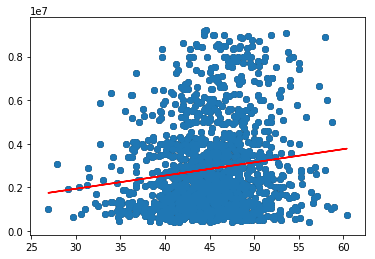

In [17]:
Y = DFValPGs['PlayerSalary'] 
X = DFValPGs['2P%']
plt.scatter(X, Y,  color='black')
stats = linregress(X, Y)
m = stats.slope
b = stats.intercept
plt.scatter(X, Y)
plt.plot(X, m * X + b, color="red")

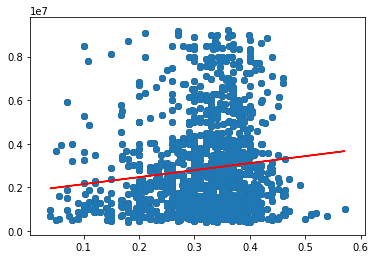

In [18]:
Y = DFValPGs['PlayerSalary'] 
X = DFValPGs['3P%']
plt.scatter(X, Y,  color='black')
stats = linregress(X, Y)
m = stats.slope
b = stats.intercept
plt.scatter(X, Y)
plt.plot(X, m * X + b, color="red")

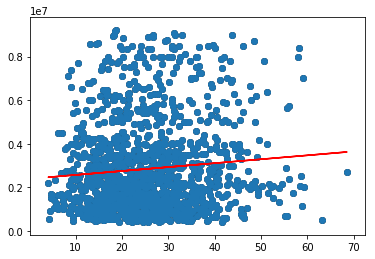

In [19]:
Y = DFValPGs['PlayerSalary'] 
X = DFValPGs['Ftr']
plt.scatter(X, Y,  color='black')
stats = linregress(X, Y)
m = stats.slope
b = stats.intercept
plt.scatter(X, Y)
plt.plot(X, m * X + b, color="red")

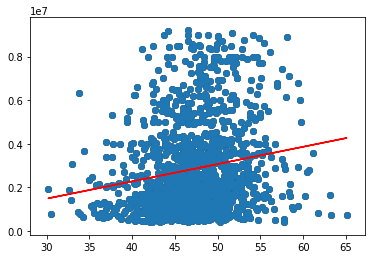

In [20]:
Y = DFValPGs['PlayerSalary'] 
X = DFValPGs['eFG%']
plt.scatter(X, Y,  color='black')
stats = linregress(X, Y)
m = stats.slope
b = stats.intercept
plt.scatter(X, Y)
plt.plot(X, m * X + b, color="red")

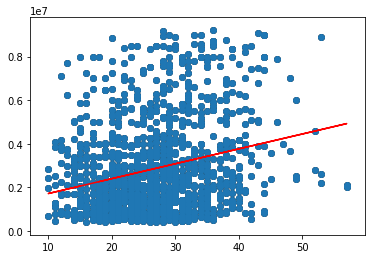

In [21]:
Y = DFValPGs['PlayerSalary'] 
X = DFValPGs['AST%']
plt.scatter(X, Y,  color='black')
stats = linregress(X, Y)
m = stats.slope
b = stats.intercept
plt.scatter(X, Y)
plt.plot(X, m * X + b, color="red")

In [30]:
X = DFValPGs[['2P%', '3P%', 'Ftr', 'eFG%', 'AST%', 'AST']]
Y = DFValPGs['PlayerSalary']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Intercept:  -905734.76382137
Coefficients:  [ -26835.00949345 1855424.16251151    6946.86607141   57269.82758366
   33889.65952233    1981.14378346]


In [63]:
StephCurr = df.loc[df['PlayerName'] == "Stephen Curry"]
StephCurr[['SeasonStart','2P%', '3P%', 'FTr', 'eFG%', 'AST%', 'AST', 'PlayerSalary ']]
SCSS = np.array(StephCurr['SeasonStart']).tolist()
SCSal = np.array(StephCurr['PlayerSalary ']).tolist()
SC2PP = np.array(StephCurr['2P%']).tolist()
SC3PP = np.array(StephCurr['3P%']).tolist()
SCFtr = np.array(StephCurr['FTr']).tolist()
SCEFG = np.array(StephCurr['eFG%']).tolist()
SCASTP = np.array(StephCurr['AST%']).tolist()
SCAST = np.array(StephCurr['AST']).tolist()

def removeSquBrackets(x):
    stringer = ""
    orig = str(x)
    for i in range(1,len(orig)-1):
        stringer = stringer + orig[i]
    return stringer

years = []
actualSalaries = []
predictedSalaries = []
differences = []

for i in range(len(SCSS)):
    #print('Year: ' + str(SCSS[i]))
    salaryNoSB = removeSquBrackets(regr.predict([[SC2PP[i], SC3PP[i], SCFtr[i], SCEFG[i], SCASTP[i], SCAST[i]]]))
    #print('Actual Salary: ', str(SCSal[i]))
    #print('Predicted Salary: ', salaryNoSB)
    diff = float(SCSal[i]) - float(salaryNoSB)
    #print('Difference(Actual - Predicted): ', str(diff), '\n')
    
    years.append(str(SCSS[i]))
    predictedSalaries.append(float(salaryNoSB))
    actualSalaries.append(float(SCSal[i]))
    differences.append(diff)
    
SCData = {
    'Year': years,
    'Actual Salary': actualSalaries,
    'Predicted Salary': predictedSalaries,
    'Difference(Actual - Predicted)': differences
}
pd.options.display.float_format = '{:.2f}'.format
SCDF = pd.DataFrame(SCData)
SCDF


,Year,Actual Salary,Predicted Salary,Difference(Actual - Predicted)
0,2010.0,2913840.00,3567063.77,-653223.77
1,2011.0,3117120.00,3684652.78,-567532.78
2,2012.0,3958742.00,3357039.69,601702.31
3,2013.0,9887642.00,4138294.12,5749347.88
4,2014.0,10629213.00,4565313.15,6063899.85
5,2015.0,11370786.00,4589658.80,6781127.20
6,2016.0,12112359.00,4361858.60,7750500.40
7,2017.0,34682550.00,3998538.54,30684011.46
